<h2> Excercise to analyze dataset and build a model to predict Absenteeism hours </h2>

<h3> Initialization </h3>

In [14]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h3> Read data and view dataset </h3>

In [15]:
# read dataset
absent_data = pd.read_csv('Absenteeism_at_work.csv',sep=';')

In [16]:
absent_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [17]:
absent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

<h3>Checking Duplicates</h3>

In [18]:
# check for duplicates
absent_data[absent_data.duplicated()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
68,34,23,10,3,4,118,10,10,37,253.465,...,0,1,0,0,0,0,83,172,28,3
88,28,23,11,4,4,225,26,9,28,306.345,...,0,1,1,0,0,2,69,169,24,1
109,10,22,12,4,4,361,52,3,28,261.306,...,0,1,1,1,0,4,80,172,27,8
127,34,27,1,2,2,118,10,10,37,308.593,...,0,1,0,0,0,0,83,172,28,2
128,34,27,1,3,2,118,10,10,37,308.593,...,0,1,0,0,0,0,83,172,28,2
131,34,27,1,4,2,118,10,10,37,308.593,...,0,1,0,0,0,0,83,172,28,2
132,27,23,1,5,2,184,42,7,27,308.593,...,0,1,0,0,0,0,58,167,21,2
133,34,27,1,5,2,118,10,10,37,308.593,...,0,1,0,0,0,0,83,172,28,2
305,5,23,10,2,4,235,20,13,43,265.017,...,0,1,1,1,0,0,106,167,38,2


In [19]:
# removing duplicates
absent_data = absent_data.drop_duplicates(keep="first")

print(absent_data.shape)

absent_data.head()

(706, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


<h3> Renaming column to remove special characters </h3>

In [20]:
# renaming column Work load Average/day to remove '/' to avoid errors
absent_data.rename(columns = {'Work load Average/day ':'Daily Workload Avg'}, inplace = True)

<h3>Finding correlation between columns to target varialble "Absenteeism time in hours"</h3>

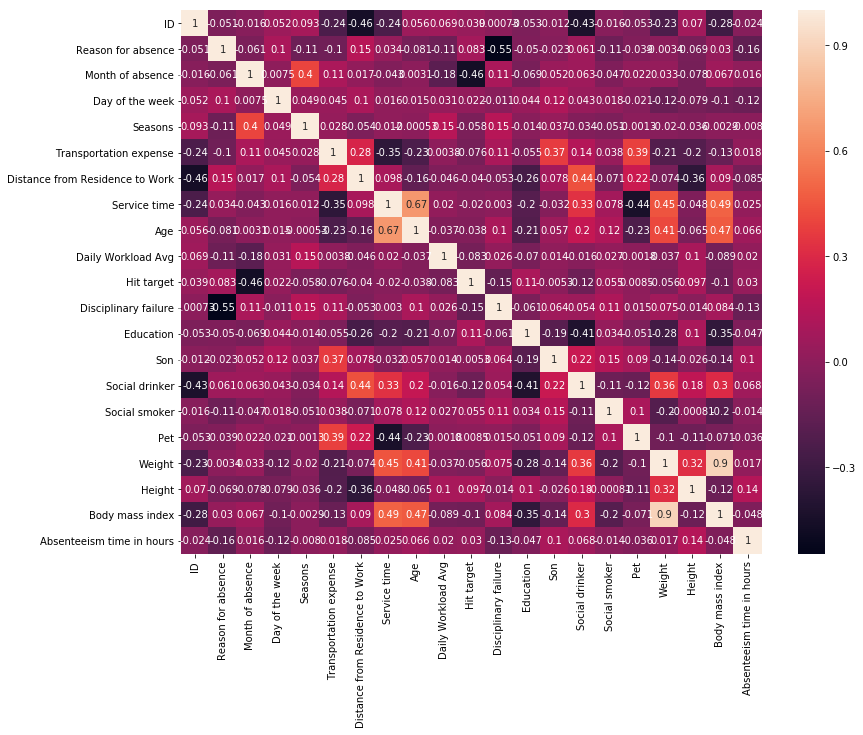

In [21]:
# check correlation between columns using heatmap

absent_data.corr()

plt.figure(figsize=(13,10))
sns.heatmap(absent_data.corr(),annot=True)

<h3>Based on correlation and logical reasoning removing few columns</h3>

In [22]:
# removing relatively higher correlation columns and other columns that are not relevant for model

absent_data.drop(['ID','Month of absence','Seasons','Son','Weight','Height','Body mass index','Hit target'],axis=1,inplace=True)
absent_data.head()

,Reason for absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Daily Workload Avg,Disciplinary failure,Education,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,26,3,289,36,13,33,239.554,0,1,1,0,1,4
1,0,3,118,13,18,50,239.554,1,1,1,0,0,0
2,23,4,179,51,18,38,239.554,0,1,1,0,0,2
3,7,5,279,5,14,39,239.554,0,1,1,1,0,4
4,23,5,289,36,13,33,239.554,0,1,1,0,1,2


<h2>Analysis & Visualization of dependent variables to target variable</h2>

<h3>View column profiling</h3>

In [ ]:
absent_data.describe()

<h3>Interpreting 'Reason for absence' variable</h3>

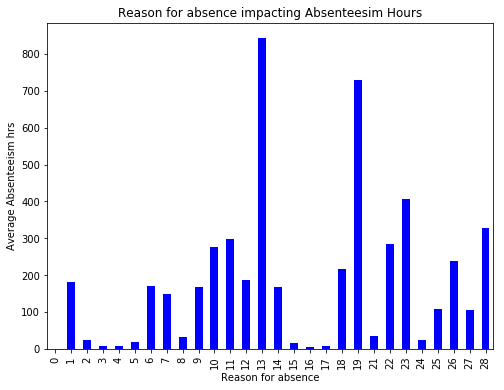

In [24]:
# group Absentee hrs by reason
reason_absence = absent_data.groupby('Reason for absence')['Absenteeism time in hours'].sum()

# plot Reason against absent hours
reason_absence.plot(kind='bar', figsize=(8,6), color='blue')

plt.xlabel('Reason for absence')
plt.ylabel('Average Absenteeism hrs')
plt.title("Reason for absence impacting Absenteesim Hours")

plt.show()

Reason 13 (Diseases of the musculoskeletal system and connective tissue) &  <br>
Reason 19 (Injury, poisoning and certain other consequences of external causes)  <br>
 together are the highest contributors for maximum Absenteeism hours.

<h3>Interpreting 'Day of the Week' variable</h3>

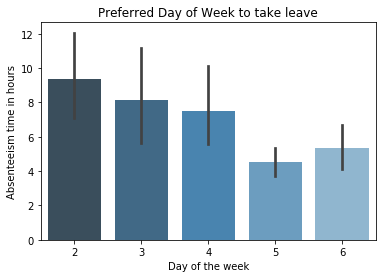

Day of Week Colum Distribution %


2    22.379603
3    21.246459
4    20.396601
6    19.121813
5    16.855524
Name: Day of the week, dtype: float64

In [25]:
# plot each day of week against absenteeism hours

sns.barplot(absent_data["Day of the week"], absent_data["Absenteeism time in hours"], palette="Blues_d")

plt.title("Preferred Day of Week to take leave")
plt.show()

# display how values are distributed within this colummn
print("Day of Week Colum Distribution %")
absent_data['Day of the week'].value_counts(normalize=True) * 100

Monday seems to the preferred day of week for Abseentism followed by Tuesday.
Possible since they fall after a weekend.

<h3>Interpreting 'Age' variable</h3>

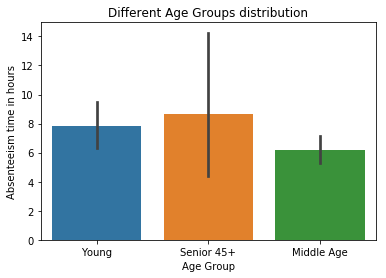

Age group Distribution %


Middle Age    48.158640
Young         40.084986
Senior 45+    11.756374
Name: Age Group, dtype: float64

In [26]:
# categorizing age into groups

absent_data['Age Group'] = ['Young' if 25<=age<=35 else 'Middle Age' if 36<=age<=45 else 'Senior 45+' if age>=46 else None \
                         for age in (absent_data['Age'])]

#plot age group against absent hours
sns.barplot(absent_data["Age Group"], absent_data["Absenteeism time in hours"])

plt.title("Different Age Groups distribution")
plt.show()

# display how values are distributed within this colummn
print("Age group Distribution %")
absent_data['Age Group'].value_counts(normalize=True) * 100

Though total composition of Senior employees are relatively less, they still contirbute more for Absenteeism hours.

<h3>Interpreting 'Daily workload' variable</h3>

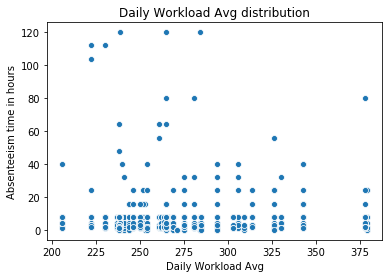

In [27]:
# round off values and change datatype for better usage within model

absent_data['Daily Workload Avg'] = round(absent_data['Daily Workload Avg'])
absent_data['Daily Workload Avg'] = absent_data['Daily Workload Avg'].astype(int)

# plot daily workload against absent hrs
sns.scatterplot(absent_data["Daily Workload Avg"], absent_data["Absenteeism time in hours"])

plt.title("Daily Workload Avg distribution")
plt.show()

Daily workload looks uniformly distributed and not much of correlation here.

<h3>Interpreting 'Education' variable</h3>

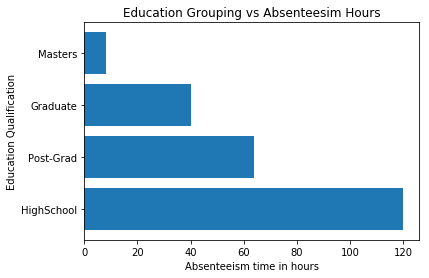

Education Group Distribution %


HighSchool    82.436261
Post-Grad     10.481586
Graduate       6.515581
Masters        0.566572
Name: Edu Group, dtype: float64

In [29]:
# grouping education into categories

absent_data['Edu Group'] = ['HighSchool' if value==1 else 'Graduate' if value==2 else 'Post-Grad' if value==3 else 'Masters' if value==4 else None \
                         for value in (absent_data['Education'])]

# plot education group against absent hrs

plt.barh(absent_data['Edu Group'], absent_data['Absenteeism time in hours'])

plt.xlabel('Absenteeism time in hours')
plt.ylabel('Education Qualification')
plt.title("Education Grouping vs Absenteesim Hours")

plt.show()

# display how values are distributed within this colummn
print("Education Group Distribution %")
absent_data['Edu Group'].value_counts(normalize=True) * 100

Employees with only High School qualification tend to take more leaves; given that their count is much higher than others in organization.

<h3>Interpreting Social activities variable</h3>

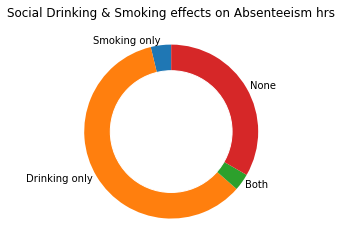

Smoker Colum Distribution %
0    92.351275
1     7.648725
Name: Social smoker, dtype: float64


Drinker Colum Distribution %
1    56.515581
0    43.484419
Name: Social drinker, dtype: float64


In [30]:
# grouping absent hours for social smokers & drinkers count

smoke = absent_data[(absent_data['Social drinker'] == 0) & (absent_data['Social smoker'] == 1)]['Absenteeism time in hours'].sum()
drink = absent_data[(absent_data['Social drinker'] == 1) & (absent_data['Social smoker'] == 0)]['Absenteeism time in hours'].sum()
drink_smoke = absent_data[(absent_data['Social drinker'] == 1) & (absent_data['Social smoker'] == 1)]['Absenteeism time in hours'].sum()
no_drink_smoke = absent_data[(absent_data['Social drinker'] == 0) & (absent_data['Social smoker'] == 0)]['Absenteeism time in hours'].sum()

# plot Social drinking & smoking against absent hours

pie_data = [smoke, drink, drink_smoke, no_drink_smoke]
pie_labels = ['Smoking only','Drinking only','Both','None']

plt.pie(pie_data, labels=pie_labels, labeldistance=1.05, startangle=90)

plt.title("Social Drinking & Smoking effects on Absenteeism hrs")

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# display how values are distributed within this colummn
print("Smoker Colum Distribution %")
print(absent_data['Social smoker'].value_counts(normalize=True) * 100)
print('\n')
print("Drinker Colum Distribution %")
print(absent_data['Social drinker'].value_counts(normalize=True) * 100)

Socila Drinkers does seem to contirbute to relatively high numbers for absenteeism.

<h3>Interpreting 'Disciplinary Failure' variable</h3>

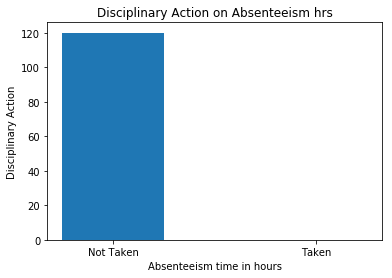

Disciplinary Action Colum Distribution %


Not Taken    94.334278
Taken         5.665722
Name: Disciplinary Action, dtype: float64

In [47]:
# updating column values for Disciplinary Failure for easier understanding

absent_data['Disciplinary Action'] = ['Not Taken' if value==0 else 'Taken' if value==1 else None \
                         for value in (absent_data['Disciplinary failure'])]

# plot disciplinary action against absenteeism

plt.bar(absent_data['Disciplinary Action'], absent_data['Absenteeism time in hours'], width=0.5)

plt.xlabel('Absenteeism time in hours')
plt.ylabel('Disciplinary Action')
plt.title("Disciplinary Action on Absenteeism hrs")

plt.show()

# display how values are distributed within this colummn
print("Disciplinary Action Colum Distribution %")
absent_data['Disciplinary Action'].value_counts(normalize=True) * 100

From above clearly states, when disciplinary action taken it does help to reduce absenteeism time.

<h3>Interpreting 'Distance to work' variable</h3>

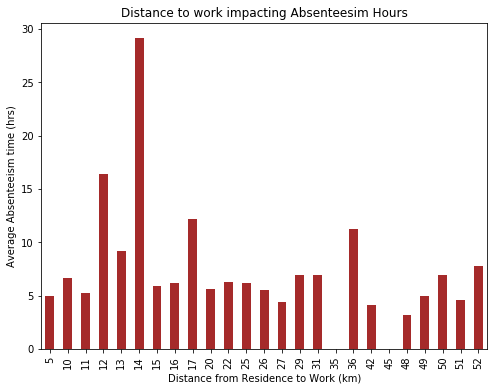

In [48]:
# grouping absent hours as per distance from residence to work
dist_wrk = absent_data.groupby('Distance from Residence to Work')['Absenteeism time in hours'].mean()

# plot distance to work against absent hours
dist_wrk.plot(kind='bar', figsize=(8,6), color='brown')

plt.xlabel('Distance from Residence to Work (km)')
plt.ylabel('Average Absenteeism time (hrs)')
plt.title("Distance to work impacting Absenteesim Hours")

plt.show()

Distance from residence to work does have an impact on absenteeism hours.

<h3>Interpreting 'Transportation expense' variable</h3>

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


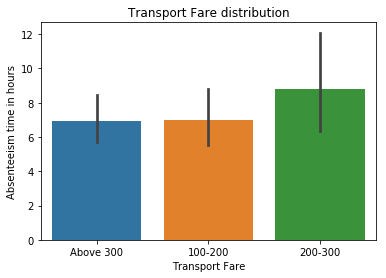

Transport Fare Column Distribution %


Above 300    48.158640
100-200      41.926346
200-300       9.915014
Name: Transport Fare, dtype: float64

In [49]:
# ccategorzing Transportation expense into multiple buckets for easier visualization
absent_data['Transport Fare'] = ['Less than 100' if 0<=fare<=99 else '100-200' if 100<=fare<=199 else '200-300' if 200<=fare>=299 else 'Above 300' \
                         for fare in (absent_data['Transportation expense'])]

#plot age group against absent hours
sns.barplot(absent_data["Transport Fare"], absent_data["Absenteeism time in hours"])

plt.title("Transport Fare distribution")
plt.show()

# display how values are distributed within this colummn
print("Transport Fare Column Distribution %")
absent_data['Transport Fare'].value_counts(normalize=True) * 100

Transportation cost does impact the absent hours especially when on the higher side.

<h3>Evaluating the target variable column - Absenteeism Hours</h3>

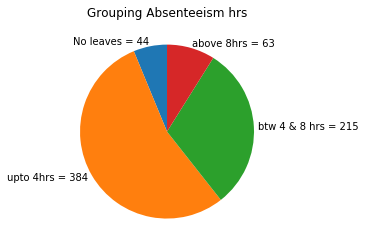

In [50]:
# classifying absenteeism hours
no_leaves = absent_data[(absent_data['Absenteeism time in hours'] == 0)]['Absenteeism time in hours'].count()
upto_4hrs = absent_data[(absent_data['Absenteeism time in hours'] >= 1) & (absent_data['Absenteeism time in hours'] <= 4)]['Absenteeism time in hours'].count()
btw_4_to_8hrs = absent_data[(absent_data['Absenteeism time in hours'] >= 5) & (absent_data['Absenteeism time in hours'] <= 8)]['Absenteeism time in hours'].count()
above_8hrs = absent_data[(absent_data['Absenteeism time in hours'] >= 9)]['Absenteeism time in hours'].count()

# plot absenteeism hours distribution
pie_data = [no_leaves, upto_4hrs, btw_4_to_8hrs, above_8hrs]
pie_labels = ['No leaves = '+ str(no_leaves), 'upto 4hrs = '+ str(upto_4hrs), 'btw 4 & 8 hrs = '+ str(btw_4_to_8hrs), 'above 8hrs = '+ str(above_8hrs)]

plt.pie(pie_data, labels=pie_labels, labeldistance=1.05, startangle=90)
plt.title("Grouping Absenteeism hrs")

plt.show()

44 records are with 0 abesent hrs or simply no leaves. <br>
More people tend to take half a day leaves.

<h2>Model Building</h2>

<h3>Categorize Absenteeism Hours into buckets to help prediction</h3>

In [52]:
absent_data['Absent Hrs'] = ['Upto 4hrs' if 0<=hrs<=4 else 'Above 4hrs' \
                         for hrs in (absent_data['Absenteeism time in hours'])]

<h3>Data Features for the model</h3>

In [54]:
#model code

absent_data_features = absent_data[['Reason for absence','Day of the week','Transportation expense','Distance from Residence to Work',
                                    'Daily Workload Avg','Service time','Age','Disciplinary failure','Education','Social drinker',
                                  'Social smoker','Pet']]

<h3>Split dataset for train & test</h3>

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

X = absent_data_features
y = absent_data['Absent Hrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

<h3>Model 1: Radom Forest Classifier</h3>

In [56]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=10, n_jobs=-1)
model.fit(X_train,y_train)

y_pred_rf = model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

  Above 8hrs       0.71      0.68      0.70        79
   Upto 4hrs       0.82      0.83      0.83       133

   micro avg       0.78      0.78      0.78       212
   macro avg       0.76      0.76      0.76       212
weighted avg       0.78      0.78      0.78       212



<b>Model Accuracy<b>

In [57]:
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7783018867924528


<b>Data Features in this model<b>

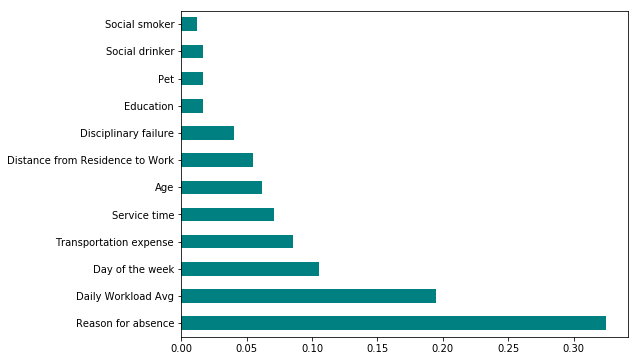

In [58]:
# data features
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='teal'))
plt.show()

<h3>Model 2: Logistic Regression</h3>

In [59]:
# Train the model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_lg = logreg.predict(X_test)

print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

  Above 8hrs       0.71      0.58      0.64        79
   Upto 4hrs       0.78      0.86      0.81       133

   micro avg       0.75      0.75      0.75       212
   macro avg       0.74      0.72      0.73       212
weighted avg       0.75      0.75      0.75       212



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<b>Model Accuracy<b>

In [60]:
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lg))

Accuracy: 0.7547169811320755


<h3>Model 3: Naive Bayes Classifier</h3>

In [62]:
# Train the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_nb = gnb.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

  Above 8hrs       0.40      1.00      0.57        79
   Upto 4hrs       1.00      0.11      0.19       133

   micro avg       0.44      0.44      0.44       212
   macro avg       0.70      0.55      0.38       212
weighted avg       0.78      0.44      0.33       212



<b>Model Accuracy<b>

In [63]:
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))

Accuracy: 0.4386792452830189
